DEVOIR MAISON 3

---
# Formule de quadrature de Fejér
---

In [1]:
import numpy as np
from scipy.special import roots_legendre
from scipy.integrate import quad
import matplotlib.pyplot as plt

Le but de ce DM est de programmer la méthode de quadrature de Fejér pour calculer l'intégrale 
\begin{equation*}
I(f) = \int\limits_{-1}^{1} f( x ) dx,
\end{equation*}
où $ f $ est une fonction continue sur $ [ -1, 1 ] $, et de la comparer avec la méthode de Gauss et la formule composée de Simpson.

Nous allons tester les différentes méthodes de quadrature sur les fonctions suivantes:
\begin{align*}
& f_0( x ) = e^x, \quad f_1( x ) = \frac{ 1 }{ 1 + 16 x^2 }, \\
& f_2( x ) = | x^2 - 0.25 |^3, \quad f_3( x ) = | x + 0.5 |^{1/2}. 
\end{align*}

On remarque que $ f_0 $ est une fonction entière, $ f_1 $ est analytique au voisinage de $ [ -1, 1 ] $, $ f_2 \in C^3 $ et $ f_3 \in C $.

**Question 1.**
> Définir les fonctions $ f_i $, $ i = 0,  1, 2, 3 $.  

In [2]:
#On définit les fonctions fi, i=0,1,2,3 pour le reste de l'exercice
f = [lambda x: np.exp(x),
     lambda x: 1/(1+16*x**2),
     lambda x: np.abs(x**2-0.25)**3,
     lambda x: np.abs(x+0.5)**(1/2),
    ]

## Formule de quadrature de Gauss à $ N $ points

On rappelle que la formule de quadrature de Gauss à $ N $ points est la formule qui s'écrit sous la forme 
\begin{equation*}
J_G( f ) = \sum\limits_{ k = 1 }^N \lambda_k f( x_k ),
\tag{1}
\end{equation*}
où les points $ x_k $, $ k = 1, \ldots, N $, sont les racines du polynome de Legendre $ P_N $ défini par recurrence via la formule:
\begin{align*}
& P_0( x ) = 1, \\
& P_1( x ) = x, \\
& P_{ N }( x ) = \frac{ ( 2 N - 1 ) x P_{ N - 1 }( x ) - ( N - 1 ) P_{ N - 2 }( x ) }{ N }
\end{align*}
et $ \lambda_k $ sont donnés par la formule
\begin{equation*}
\lambda_k = \frac{ 1 - x_k^2 }{ N P^2_{ N-1 }( x_k ) }.
\end{equation*}


**Question 2.** 
> 1. Programmez une fonction `gauss` qui prend en argument une fonction `f` et un entier `N` et qui retourne une valeur approchée de $ I(f) $ obtenue par la formule de quadrature de Gauss (1). On pourra utiliser la fonction `roots_legendre` du module `scipy.special`.
> 2. Tester votre fonction en comparant la valeur de $ \int\limits_{-1}^1 f_i(x)dx $ calculée à l'aide de la fonction `quad` de `scipy.integrate` et à l'aide de votre fonction `gauss` pour les fonction $ f_i $, $ i = 0, 1, 2, 3 $.

In [3]:
def gauss(f, N):
    """Calcul de l'intégrale de f(x) sur l'intervalle [-1, 1] en utilisant la formule de Gauss à N points"""
    
    #Calcul avec la méthode roots_legendre de scipy.special
    roots,weights = roots_legendre(N)
    return np.sum(weights * f(roots))

In [4]:
liste_N = np.arange(2,10)

for i,fi in enumerate(f):
    print(f"fi = f{i}")
    for N in liste_N:
        print(f"gauss (pour N ={N}) = {gauss(fi, N)}",
         f"et quad = {quad(fi,-1,1)[0]}")

fi = f0
gauss (pour N =2) = 2.3426960879097307 et quad = 2.3504023872876028
gauss (pour N =3) = 2.3503369286800115 et quad = 2.3504023872876028
gauss (pour N =4) = 2.3504020921563766 et quad = 2.3504023872876028
gauss (pour N =5) = 2.350402386462826 et quad = 2.3504023872876028
gauss (pour N =6) = 2.3504023872860342 et quad = 2.3504023872876028
gauss (pour N =7) = 2.3504023872876014 et quad = 2.3504023872876028
gauss (pour N =8) = 2.3504023872876028 et quad = 2.3504023872876028
gauss (pour N =9) = 2.3504023872876023 et quad = 2.3504023872876028
fi = f1
gauss (pour N =2) = 0.31578947368421056 et quad = 0.6629088318340162
gauss (pour N =3) = 0.9937106918238988 et quad = 0.6629088318340162
gauss (pour N =4) = 0.5118212522733177 et quad = 0.6629088318340162
gauss (pour N =5) = 0.7721547547946116 et quad = 0.6629088318340162
gauss (pour N =6) = 0.6029222321445539 et quad = 0.6629088318340162
gauss (pour N =7) = 0.7019205771618546 et quad = 0.6629088318340162
gauss (pour N =8) = 0.6400200424

## Formule composée de Simpson à $ N $ points  

On remarque que la formule de quadrature de Gauss à $ N $ points (1) utilise exactement $ N $ *points de quadrature*, i.e. $ N $ points où $ f $ est évaluée. 

La formule composée de Simpson utilise toujours un nombre *impair* de points de quadrature. Plus particulièrment, la formule composée de Simpson à $ N $ points de quadrature, pour $ N $ impair, s'écrit
\begin{equation*}
J_S( f ) = \frac{ h }{ 3 } \sum\limits_{ k = 1 }^{ m }[ f( x_{ 2k - 2 } ) + 4 f( x_{2k - 1} ) + f( x_{ 2k } ) ]
\tag{2}
\end{equation*}
où $ m = N // 2 $, $ h = \frac{ b - a }{ 2m } $, $ x_k = a + k h $.

**Question 3.** 
> 1. Programmez une fonction `simpson` qui prend en argument une fonction `f` et un entier impair `N` et qui retourne une valeur approchée de $ I(f) $ obtenue par la formule composée de Simpson à $ N $ points de quadrature (2). *On privilégiera une implémentation qui n'utilise pas de boucle for.* 
> 2. Tester votre fonction en comparant la valeur de $ \int\limits_{-1}^1 f_i(x)dx $ calculée à l'aide de la fonction `quad` de `scipy.integrate` et à l'aide de votre fonction `simpson` pour les fonction $ f_i $, $ i = 0, 1, 2, 3 $.

In [5]:
def simpson(f, N):
    """Calcul de l'intégrale de f(x) sur l'intervalle [-1, 1] en utilisant la formule de Simpson à N points impaires"""
    
    # Vérification que N est un nombre impair
    if N % 2 == 0:
        raise ValueError("N doit être un nombre impair")
    
    # Calcul des données
    h = 2 / (N-1)
    x = [-1 + i * h for i in range(N)]
    
    # Calcul de la somme pour les points pairs
    sum_pairs = np.sum([2 * f(x[i]) for i in range(2, N-1, 2)])
    
    # Calcul de la somme pour les points impairs
    sum_odds = np.sum([4 * f(x[i]) for i in range(1, N-1, 2)])
    
    # Calcul de l'intégrale
    integral = h/3 * (f(x[0]) + f(x[N-1]) + sum_pairs + sum_odds)
    
    return integral

In [6]:
liste_N = np.arange(3,10,2)

for i,fi in enumerate(f):
    print(f"fi = f{i}")
    for N in liste_N:
        print(f"simpson (pour N ={N}) = {simpson(fi, N)}",
         f"et quad = {quad(fi,-1,1)[0]}")

fi = f0
simpson (pour N =3) = 2.362053756543496 et quad = 2.3504023872876028
simpson (pour N =5) = 2.3511948318802554 et quad = 2.3504023872876028
simpson (pour N =7) = 2.350561486811035 et quad = 2.3504023872876028
simpson (pour N =9) = 2.3504530172422795 et quad = 2.3504023872876028
fi = f1
simpson (pour N =3) = 1.372549019607843 et quad = 0.6629088318340162
simpson (pour N =5) = 0.6196078431372549 et quad = 0.6629088318340162
simpson (pour N =7) = 0.7271053809651714 et quad = 0.6629088318340162
simpson (pour N =9) = 0.6431372549019608 et quad = 0.6629088318340162
fi = f2
simpson (pour N =3) = 0.3020833333333333 et quad = 0.09375000000000001
simpson (pour N =5) = 0.14583333333333331 et quad = 0.09375000000000001
simpson (pour N =7) = 0.10842001981405272 et quad = 0.09375000000000001
simpson (pour N =9) = 0.09765625 et quad = 0.09375000000000001
fi = f3
simpson (pour N =3) = 1.5867595924414424 et quad = 1.4604471317871044
simpson (pour N =5) = 1.2243442024918718 et quad = 1.4604471317

## Formule de quadrature de Fejér à $N$ points
La formule de quadrature de Fejér fait intervenir les points et les polynomes de Tchebychev. On rappelle que les polynomes de Tchebychev $ T_N $ sont des polynomes définis sur $ [ -1, 1 ] $ via la formule 
$$
T_N( \cos \theta ) = \cos( N \theta ).
$$
On peut également les définir via la formule recurrente suivante:
\begin{align*}
& T_0( x ) = 1, \\
& T_1( x ) = x, \\
& T_N( x ) = 2 x T_{ N-1 }( x ) - T_{ N-2 }( x ).
\end{align*}

Les points de Tchebychev $ x_{ k, N } $, $ k = 1, \ldots, N $, sur $ [ -1, 1 ] $ sont définis par la formule
\begin{equation*}
x_{ k, N } = \cos\left( \frac{ 2k - 1 }{ 2 N } \pi \right), \quad k = 1, 2, \ldots, N.
\end{equation*}

**Question 4.** 
> Rappeler pourquoi les points de Tchebychev $ x_{k, N} $, $ k = 1, \ldots, N $, sont racines du polynome de Tchebychev $ T_N $.

**Question 5.**
> 1. Définir une fonction `poly_tchebychev` qui prend en argument un `ndarray` `x` et un entier positif `N` et qui retourne l'évaluation de $ T_N $ en $ x $. 
> 2. Définir une fonction `points_tchebychev` qui prend en argument un entier positif $ N $ et qui retourne un `ndarray` des points de Tchebychev $ x_{ k, N } $, $ k = 1, \ldots, N $. *On privilégiera une implémentation qui n'utilise pas de boucle for.*
> 3. Tester vos fonctions en évaluant un polynome de Tchebychev $ T_N $ en les points de Tchebychev $ x_{ k, N } $, $ k = 1, \ldots, N $.

**Réponce à la question 4:**\
Les points de Tchebychev sont définis comme les zéros du polynôme de Tchebychev de degré N, noté $ T_N(x) $. Ce polynôme est défini par la relation de récurrence suivante:
\begin{align*}
& T_0( x ) = 1, \\
& T_1( x ) = x, \\
& T_N( x ) = 2 x T_{ N-1 }( x ) - T_{ N-2 }( x ).
\end{align*}

En utilisant cette relation de récurrence, on peut montrer que les racines du polynôme T_N(x) sont donnés par les formules suivantes:
\begin{equation*}
x_{ k, N } = \cos\left( \frac{ 2k - 1 }{ 2 N } \pi \right), \quad k = 1, 2, \ldots, N.
\end{equation*}

Maintenant, pour montrer que ces racines sont également les points de Tchebychev, nous avons besoin de définir la notion de norme de Tchebychev. La norme de Tchebychev d'un point x est définie comme:

\begin{equation*}
T_N(x) = \cos(N \arccos(x)).\\
\end{equation*}

Il est alors possible de montrer que pour tout k=1,...,N, T_N(x_k,N) = 0. En effet, si on utilise la formule de l'angle double pour cos(2θ), on obtient:

\begin{equation*}
\cos(2N \arccos(x_k,N)) = \cos((2k-1)π) = -1\\
\end{equation*}

Puisque $\cos(2N arccos(x_k,N))$ est égal à $T_N(x_k,N)$ , cela implique que $T_N(x_k,N) = 0$.

Donc, les points de Tchebychev sont également les racines du polynôme de Tchebychev $T_N(x)$, ce qui est une propriété importante de ces polynômes.

In [7]:
def poly_tchebychev(x , N):
    """Création des polynômes de Tchebychev de degré N"""
    if N == 0:
        return np.ones(x.shape)
    elif N == 1:
        return x
    else:
        return 2*x*poly_tchebychev(x , N-1) - poly_tchebychev(x , N-2)
    
def points_tchebychev(N):
    """Calcul des racines du polynôme de Tchebychev"""
    return np.cos(np.pi*(2*np.arange(1,N+1) - 1)/(2*N))

In [8]:
for N in range(1,10):
    x = points_tchebychev(N)
    print(f"T_{N}(xk) = {poly_tchebychev(x, N)}",
         f"et x_k{N} = {points_tchebychev(N)}")

T_1(xk) = [6.123234e-17] et x_k1 = [6.123234e-17]
T_2(xk) = [ 2.22044605e-16 -2.22044605e-16] et x_k2 = [ 0.70710678 -0.70710678]
T_3(xk) = [ 3.33066907e-16 -1.83697020e-16 -3.33066907e-16] et x_k3 = [ 8.66025404e-01  6.12323400e-17 -8.66025404e-01]
T_4(xk) = [-2.22044605e-16 -2.22044605e-16  1.11022302e-16 -2.22044605e-16] et x_k4 = [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
T_5(xk) = [-4.44089210e-16  0.00000000e+00  3.06161700e-16 -7.77156117e-16
  4.44089210e-16] et x_k5 = [ 9.51056516e-01  5.87785252e-01  6.12323400e-17 -5.87785252e-01
 -9.51056516e-01]
T_6(xk) = [ 7.77156117e-16 -3.33066907e-16 -2.22044605e-16 -7.77156117e-16
  6.66133815e-16 -1.55431223e-15] et x_k6 = [ 0.96592583  0.70710678  0.25881905 -0.25881905 -0.70710678 -0.96592583]
T_7(xk) = [ 2.22044605e-16  0.00000000e+00  4.44089210e-16 -4.28626380e-16
  4.44089210e-16 -3.55271368e-15 -4.88498131e-15] et x_k7 = [ 9.74927912e-01  7.81831482e-01  4.33883739e-01  6.12323400e-17
 -4.33883739e-01 -7.81831482e-01 -9


La formule de quadrature de Fejér à $ N $ points s'écrit sous la forme 
\begin{equation*}
J_F( f ) = \sum\limits_{ k = 1 }^N \lambda_k f( x_k ),
\tag{1}
\end{equation*}
où $ x_k = x_{ k, N } $, $ k = 1, \ldots, N $, sont les points de Tchebychev
et $ \lambda_k $ sont donnés par la formule
\begin{equation*}
\lambda_k = \frac{ 2 }{ N }\left( 1 - \sum_{ m = 1 }^{ \lfloor N/2 \rfloor }  \frac{ 2T_{ 2m }( x_k ) }{ 4 m^2 - 1 }  \right).
\end{equation*}

**Question 6.** 
> 1. Programmez une fonction `fejer_points_weights` qui prend en argument un entier `N` et qui retourne un ndarray `x` des points de Tchebychev $ x_{k, N} $ et un ndarray `lam` des poids $ \lambda_k $ de la formule de Fejér.
> 2. Programmez une fonction `fejer` qui prend en argument une fonction `f` et un entier `N`et qui retourne une valeur approchée de $ I $ obtenue par la formule de quadrature de Fejér. 
> 3. Tester votre fonction en comparant la valeur de $ \int\limits_{-1}^1 f_i(x)dx $ calculée à l'aide de la fonction `quad` de `scipy.integrate` et à l'aide de votre fonction `fejer` pour les fonction $ f_i $, $ i = 0, 1, 2, 3 $.

In [9]:
def fejer_points_weights(N):
    """
    Retourne les points de Tchebychev x et les poids lam de la formule de Fejér pour un entier N donné.
    """
    
    #Création des variables
    x = points_tchebychev(N)
    lam = np.zeros(N)
    
    for k in range(N):
        somme = 0
        for m in range(1,(N//2)+1):
            somme +=  (2*poly_tchebychev(x[k] , 2*m)) / (4*m**2 - 1)
        lam[k] = (2/N) * (1 - somme)
    return x, lam

In [10]:
def fejer(f, N):
    """Calcul de l'intégrale de f(x) sur l'intervalle [-1, 1] en utilisant la formule de Fejér à N points"""
    xk,lam = fejer_points_weights(N)
    return np.sum(lam * f(xk))

In [11]:
liste_N = np.arange(1,10)

for i,fi in enumerate(f):
    print(f"fi = f{i}")
    for N in liste_N:
        print(f"fejer (pour N ={N}) = {fejer(fi, N)}",
         f"et quad = {quad(fi,-1,1)[0]}")

fi = f0
fejer (pour N =1) = 2.0 et quad = 2.3504023872876028
fejer (pour N =2) = 2.521183673042712 et quad = 2.3504023872876028
fejer (pour N =3) = 2.35469453390679 et quad = 2.3504023872876028
fejer (pour N =4) = 2.351164449305366 et quad = 2.3504023872876028
fejer (pour N =5) = 2.3504110924399146 et quad = 2.3504023872876028
fejer (pour N =6) = 2.3504049906823328 et quad = 2.3504023872876028
fejer (pour N =7) = 2.350402405080618 et quad = 2.3504023872876028
fejer (pour N =8) = 2.350402393654548 et quad = 2.3504023872876028
fejer (pour N =9) = 2.3504023873162794 et quad = 2.3504023872876028
fi = f1
fejer (pour N =1) = 2.0 et quad = 0.6629088318340162
fejer (pour N =2) = 0.22222222222222224 et quad = 0.6629088318340162
fejer (pour N =3) = 1.179487179487179 et quad = 0.6629088318340162
fejer (pour N =4) = 0.4761904761904763 et quad = 0.6629088318340162
fejer (pour N =5) = 0.7960396039603961 et quad = 0.6629088318340162
fejer (pour N =6) = 0.5849607182940518 et quad = 0.6629088318340162


## Comparaison des méthodes

**Question 7.**
> 1. Pour chacune des fonction $ f_i $, $ i = 0, 1, 2, 3 $, tracez sur un graphique le logarithme d'erreur entre la valeur "exacte" de $ I $ (calculée via `quad`) et l'intégrale approchée calculée via les méthodes de Simpson composée, la méthode de Gauss et la méthode de Fejér à $ N $ points en fonction de $N$ (on prendra que des valeurs impairs de $N$). Ajoutez à chacun des quatre graphiques un titre et une légende. 
> 2. Commentez les résultats obtenus. Quelle méthode choisiriez-vous pour l'intégration de fonctions entières? Pour l'intégration de fonctions peu regulières?

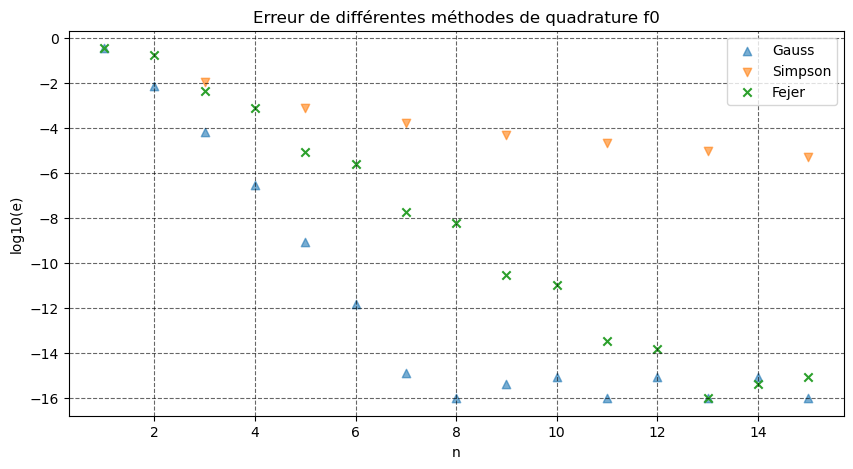

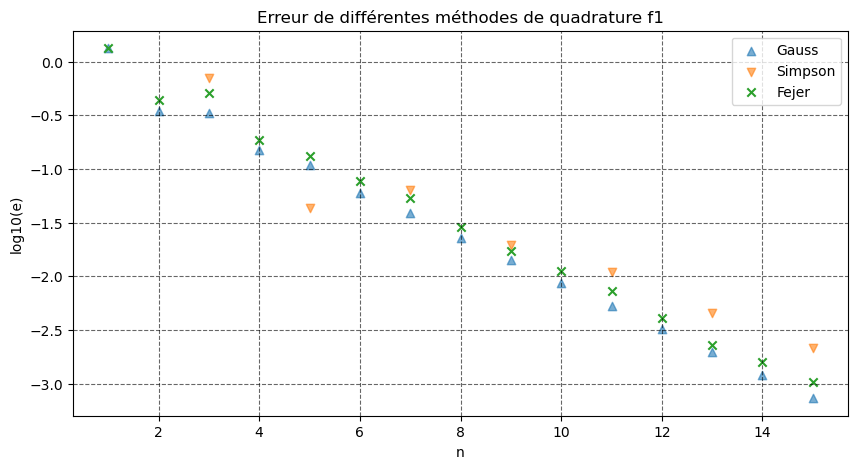

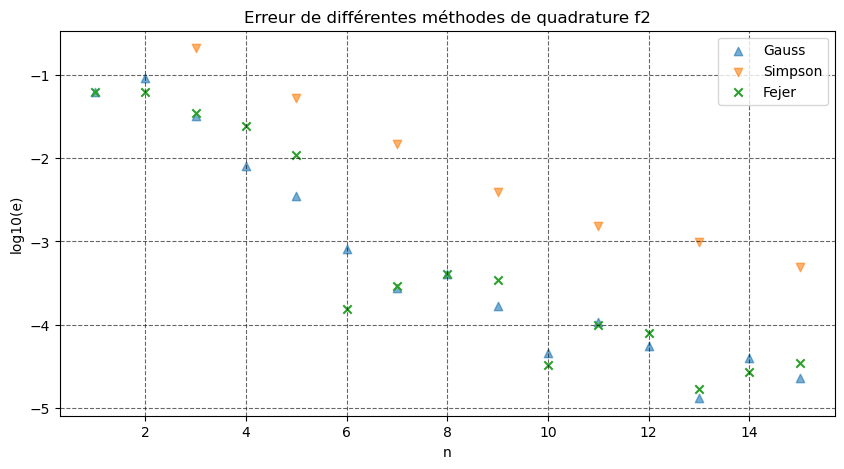

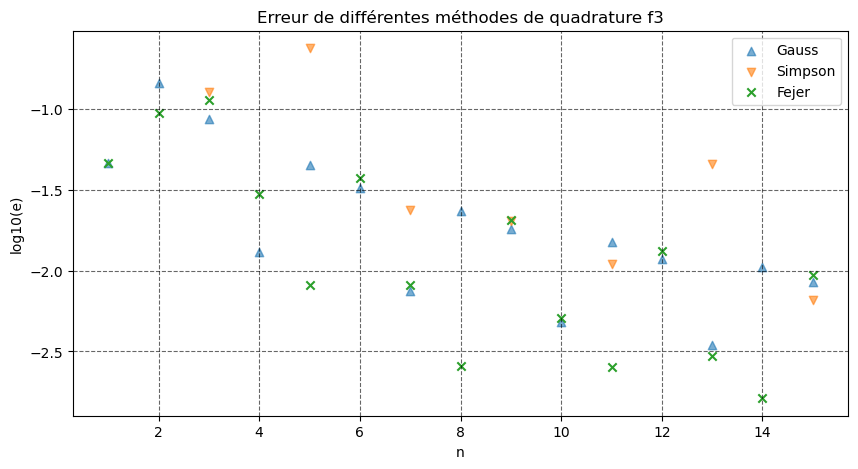

In [24]:
for i,fi in enumerate(f):
    N = 15

    error_gauss = np.zeros( ( N, ) )
    error_fejer = np.zeros( ( N, ) ) 
    error_simp = np.zeros( ( (N-1)//2, ) )
    I, _ = quad( fi, -1., 1., epsabs = 1e-14 )
    for n in range( 1, N+1 ):
        I_gauss = gauss( fi, n )
        error_gauss[ n - 1 ]  = np.abs( I_gauss - I )
        
        I_fejer = fejer( fi, n )
        error_fejer[ n - 1 ]  = np.abs( I_fejer - I )
        
    for n in range( 3, N+1, 2 ):
        I_simp = simpson( fi, n )
        error_simp[ (n - 2)//2 ] = np.abs( I_simp - I )
    
    fig = plt.figure( figsize = (10, 5) )
    ax = fig.add_subplot(1, 1, 1 )
    ax.scatter( np.arange( 1, N+1 ), np.log10( error_gauss, out = -16. * np.ones( error_gauss.shape ), 
                                          where = ( error_gauss > 1e-16 ) ), label = 'Gauss' , marker = "^", alpha = 0.6)
    ax.scatter( np.arange( 3, N+1, 2 ), np.log10( error_simp ), label = 'Simpson' , marker = 'v', alpha = 0.6)
    ax.scatter( np.arange( 1, N+1 ), np.log10( error_fejer, out = -16. * np.ones( error_fejer.shape ), 
                                          where = ( error_fejer > 1e-16 ) ), label = 'Fejer' , marker = 'x')
    ax.legend()
    ax.set_title( f"Erreur de différentes méthodes de quadrature f{i}" )
    ax.set_xlabel( "n" )
    ax.set_ylabel( "log10(e)" )
    ax.grid(linestyle = "--", color = 'black',alpha = 0.6)

## Degré de précision de la formule de Fejér

Nous allons maintenant trouver numériquement le dégré de précision de la formule de Fejer.

On rappelle qu'une formule de quadrature $ J(f) $ est dite précise à l'ordre $ d $ si $ J( p ) = I( p ) $ pour tout $ p \in \mathbb{R}_d[ X ] $ et $ J( x^{ d + 1 } ) \neq I( x^{ d + 1 } ) $, où $ I( p ) $ est la valeur exacte de l'intégrale de $ p $. 

Nous allons tout d'abord vérifier numériquement que la formule $ J_G $ sur $ [-1,1] $ est précise de dégré $ 2N - 1 $.

*Les questions théoriques Question 9 et Question 11 sont facultatives (questions bonus). Vous pouvez utiliser les résultats de ces questions pour jusifier vos réponses aux Questions 10 et 12.*

**Question 9 (bonus).**
> 1. Expliquez pourquoi il suffit de montrer que $ J_G( x^k ) = I( x^k ) $, $ k = 0, 1, \ldots, 2N-1 $ et $  J_G( x^{ 2N } ) \neq I( x^{ 2N } ) $ pour montrer que $ J_G $ est précise de dégré $ 2N - 1 $.
> 2. Montrer que $ P_{ 2k } $ est une fonction paire et $ P_{ 2k + 1 } $ est une fonction impaire, $ k = 0, 1, 2, \ldots $, où $ P_N $ est le $ N $-ième polynome de Legendre. En déduire que $ \forall N \in \mathbb{N} $ si $ x $ est racine de $ P_N $, alors $ -x $ est aussi racine de $ P_N $. En déduire que pour $ k $ impair on a toujours $ J_G( x^k ) = I( x^k ) = 0 $.

**Question 10.**
> 1. Pour les valeurs $k = \lbrace 0, 2, 4, 6, 8, 10 \rbrace$ calculez l'erreur d'approximation de l'intégrale $ I(x^k) $ par la formule de Gauss à $ N $ points avec $N =  1,2,3, \ldots, 10$. Affichez l'erreur sous le format ci-dessous.
> 2. Expliquez comment les résultats obtenus montrent numériquement que la formule de quadrature de Gauss à $ N $ points est précise de degré $ 2N - 1 $.


```
------------------------------------------------------------------------------
     N        x^0      x^2      x^4      x^6      x^8      x^10      
------------------------------------------------------------------------------
     1        0.000    0.667    0.400    0.286    0.222    0.182  
     2        0.000    0.000    0.178    0.212    0.198    0.174  
    ...        ...      ...      ...      ...      ...      ...
```

**Question 11 (bonus).**
> Montrez que pour les points de Tchebychev $ x_{k, N} $ on a $ x_{ N+1-k, N } = -x_{k, N} $. En déduire que pour $ k $ impair on a toujours $ J_F( x^k ) = I( x^k ) = 0 $.

**Question 12.**
> 1. Reprendre la question 10.1 pour la formule de Fejér. 
> 2. En utilisant les résultats de la question 12.1 trouver numériquement le degré de précision de la formule de Fejér. Comparer avec le degré de précision de la formule de Newton-Cotes à $N$ points.

In [28]:
#Question 10
fx = lambda x: x**k

N = 15
K = 10

taille = (2+K*5)

print('-'*taille)
print(f" N ", end='')
for k in range( 0, K+1, 2 ):
    print(f"   x^{k}  ", end='')
print()
print('-'*taille)
for n in range( 1, N+1 ):
    print(f"{n:2d}  ", end='')
    for k in range( 0, K+1, 2 ):
        Jg = gauss(fx, n)
        I, _ = quad( fx, -1., 1., epsabs = 1e-14 )
        error = np.abs(Jg - I)
        if error <= 1e-14:
            error = 0.
        print(f"{error : 0.3f}  ", end='')
    print()
print('-'*taille)

----------------------------------------------------
 N    x^0     x^2     x^4     x^6     x^8     x^10  
----------------------------------------------------
 1   0.000   0.667   0.400   0.286   0.222   0.182  
 2   0.000   0.000   0.178   0.212   0.198   0.174  
 3   0.000   0.000   0.000   0.046   0.078   0.095  
 4   0.000   0.000   0.000   0.000   0.012   0.026  
 5   0.000   0.000   0.000   0.000   0.000   0.003  
 6   0.000   0.000   0.000   0.000   0.000   0.000  
 7   0.000   0.000   0.000   0.000   0.000   0.000  
 8   0.000   0.000   0.000   0.000   0.000   0.000  
 9   0.000   0.000   0.000   0.000   0.000   0.000  
10   0.000   0.000   0.000   0.000   0.000   0.000  
11   0.000   0.000   0.000   0.000   0.000   0.000  
12   0.000   0.000   0.000   0.000   0.000   0.000  
13   0.000   0.000   0.000   0.000   0.000   0.000  
14   0.000   0.000   0.000   0.000   0.000   0.000  
15   0.000   0.000   0.000   0.000   0.000   0.000  
----------------------------------------------

In [30]:
#Question 12
fx = lambda x: x**k

N = 15
K = 10

taille = (2+K*5)

print('-'*taille)
print(f" N ", end='')
for k in range( 0, K+1, 2 ):
    print(f"   x^{k}  ", end='')
print()
print('-'*taille)
for n in range( 1, N+1 ):
    print(f"{n:2d}  ", end='')
    for k in range( 0, K+1, 2 ):
        Jf = fejer(fx, n)
        I, _ = quad( fx, -1., 1., epsabs = 1e-14 )
        error = np.abs(Jf - I)
        if error <= 1e-14:
            error = 0.
        print(f"{error : 0.3f}  ", end='')
    print()
print('-'*taille)

----------------------------------------------------
 N    x^0     x^2     x^4     x^6     x^8     x^10  
----------------------------------------------------
 1   0.000   0.667   0.400   0.286   0.222   0.182  
 2   0.000   0.333   0.100   0.036   0.097   0.119  
 3   0.000   0.000   0.100   0.089   0.059   0.029  
 4   0.000   0.000   0.017   0.048   0.059   0.058  
 5   0.000   0.000   0.000   0.006   0.017   0.027  
 6   0.000   0.000   0.000   0.002   0.005   0.010  
 7   0.000   0.000   0.000   0.000   0.001   0.002  
 8   0.000   0.000   0.000   0.000   0.000   0.001  
 9   0.000   0.000   0.000   0.000   0.000   0.000  
10   0.000   0.000   0.000   0.000   0.000   0.000  
11   0.000   0.000   0.000   0.000   0.000   0.000  
12   0.000   0.000   0.000   0.000   0.000   0.000  
13   0.000   0.000   0.000   0.000   0.000   0.000  
14   0.000   0.000   0.000   0.000   0.000   0.000  
15   0.000   0.000   0.000   0.000   0.000   0.000  
----------------------------------------------